<a href="https://colab.research.google.com/github/Navjotkhatri/Real_Estate_Analysis_EDA/blob/main/Real_Estate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Estate Analysis Project**

## **Overview**

This project involves analyzing real estate data to uncover trends, make predictions, and provide actionable insights for stakeholders. The analysis includes data cleaning, exploratory data analysis (EDA), and predictive modeling to understand property values and identify factors influencing real estate prices.

Consider including the following metrics in your analysis:

Cost per Square Foot

Project Type distribution

Flat booking status percentage (over the years or location-wise)

Return on investment of projects (Project Profit)

In [74]:

#import library
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
alldata_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/AllData.csv")

In [76]:
alldata_df.head()

,projectAckNo,promoterType,projRegNo,promoterEmailId,formOneId,formTwoId,certificateId,projectType,certificateUid,projRegId,promoterId,approvedDate,promoterName,appSubmissionDate,projectName,formThreeId,wfoId
0,PR/GANDHINAGAR/KALOL/AUDA/170720/000112,COMPANY,PR/GJ/GANDHINAGAR/KALOL/AUDA/MAA00023/EX1/100119,supercity.luxuria2@gmail.com,16348,18617,303496,Mixed Development,IYKCU6VLGGFN890HPEH5OJC45N2URSJINZYSV7LNV2LG2J...,198,13575,2017-08-29 00:00:00,SHRINIVAS ORGANISORS PRIVATE LIMITED,2017-07-20 00:00:00,SUPER CITY PHASE 1,265740,198
1,PR/AHMEDABAD/AHMADABAD CITY/AHMEDABAD TPO/1707...,PARTNERSHIP FIRM,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/CAA00045/0...,thefirstrera@gmail.com,7651,10032,83518,Commercial,JTDQ6PBWY6YHRK1P3INABJ57N0CYCUHBWHUWVHVGLG7PCS...,312,502,2017-01-09 00:00:00,Synthesis Corporation,2017-07-25 00:00:00,THE FIRST,239188,312
2,PR/AHMEDABAD/AHMADABAD CITY/AHMEDABAD TPO/1707...,COMPANY,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/MAA00012/2...,rera@ganeshhousing.net,11606,13113,83437,Mixed Development,F21G5ZHZN5OX5OAXYMC9C9X1VMMJA7KWIA3WG31QWINWFN...,344,543,2017-08-24 00:00:00,Essem Infra Private Limited,2017-07-30 00:00:00,MAPLE TREE,238469,344
3,PR/AHMEDABAD/AHMADABAD CITY/AUDA/170729/000237,LIMITED LIABILITY PARTNERSHIP FIRM,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/CAA00003/2...,sumel8.rera@hnsafal.com,179,136,83395,Commercial,GMUCWGJAB8GM2A1D69RZNVHDXNI46E765G6LY7G7YAEP9P...,389,610,2017-08-21 00:00:00,HN SAFAL REALTECH LLP,2017-07-29 00:00:00,Sumel-8,240923,389
4,PR/AHMEDABAD/AHMADABAD CITY/AHMEDABAD TPO/1707...,LIMITED LIABILITY PARTNERSHIP FIRM,PR/GJ/AHMEDABAD/AHMADABAD CITY/AUDA/CAA00002/2...,one42farpoint@gmail.com,19320,22533,83430,Commercial,0JBMHTCTJ1T51BKTLN2TR0Q2F1YPOZS9ACL39RNL6L1BBP...,475,744,2017-08-21 00:00:00,FARPOINT PROPERTIES LLP,2017-07-28 00:00:00,ONE42,238348,475


In [77]:
formthreeA_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/FormThreeA.csv")
formthreeB_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/FormThreeB.csv")
location_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/Location.csv")
distict_df=pd.read_csv("/content/drive/MyDrive/Assignment_reeva/district.csv")

In [78]:
formthreeA_df.head()

,id,formThreePk,blockId,blockName,usage,flatNo,carpetArea,areaofExBalcony,status,unitConsideration,encumbranceStatus,dateOfAgrrement,redeveloped,createdOn,projectRegID,receivedAmount,balanceAmount
0,22288167,238348,455,North Tower,Office,NT-101-102-103,452.46,0.0,BOOKED,54530683,No Encumbrance,,NO,,475,52020700,2510000
1,22288168,238348,455,North Tower,Office,NT-104,226.80,0.0,UNBOOKED,34200000,No Encumbrance,,NO,,475,0,34200000
2,22288169,238348,455,North Tower,Office,NT-105,229.68,0.0,BOOKED,28978238,No Encumbrance,,NO,,475,25474200,3504070
3,22288170,238348,455,North Tower,Office,NT-201-202-203-204-205,908.94,0.0,BOOKED,106202043,No Encumbrance,,NO,,475,99168200,7033820
4,22288171,238348,455,North Tower,Office,NT-301-302-303-304-305,908.94,0.0,BOOKED,106202043,No Encumbrance,,NO,,475,94535100,11667000


In [79]:
formthreeB_df.head()

,id,methodLandValuation,valuationReportId,valuationReportUId,amountofPremiumPayableA,acquisitionCostofTDRA,acquisitionCostofTDRB,amountsPayabletoStateGovernmentA,amountsPayabletoStateGovernmentB,landPremiumPayableA,...,estAmtofSalesProceedsinRespectofUnbookedAptmnts_new,estReceivablesofOngoingProject_new,amttobeDepositedinDesigAcc_new,acquisitionCostofLandA,acquisitionCostofLandB,amountofPremiumPayableB,balAmtofReceivablesfromBookedAptmnts,estAmtofSalesProceedsinRespectofUnbookedAptmnts,estReceivablesofOngoingProject,amttobeDepositedinDesigAcc
0,15518,,,,0,0,0,3075000,3075000,0,...,,,,173524000,173524000,0,412725000,1177200000,1589920000,70
1,8775,,,,295000000,0,0,0,0,0,...,,,,61186500,61186500,295000000,182897000,375147000,558044000,100
2,10921,,,,597700000,0,0,169100000,169098743,0,...,,,,3689800000,3701180000,629604000,2842230000,1982630000,4824860000,70
3,403,,,,126902000,0,0,17797600,17797600,0,...,,,,1197430000,1197430000,126902000,890747000,1906260000,2797010000,70
4,18311,,,,35695000,188300000,188300000,64900650,64900650,0,...,,,,1100000000,1100000000,35695000,603818000,633300000,1237120000,70


In [80]:
location_df.head()

,locId,projectName,promotorName,projectCost,projectType,processType,promotorType,projectStatus,address,subDistrictCode,subDistrictName,districtCode,districtName,waterLevel,projectId,status,coordinates,centroid
0,100,SUPER CITY PHASE 1,Shrinivas Organisors Pvt Ltd,2861640000,Mixed Development,REG,Company,Ongoing,BHADAJ DENTAL COLLEGE ROADNEAR SCIENCE CITY,,Kalol,GANDHI,Gandhinagar,,198,SUCCESS,"[{""locId"": 897, ""lat"": ""23.095769424301377"", ""...","[23.095461029853023, 72.46593454099164]"
1,251,THE FIRST,Synthesis Corporation,2960000000,Commercial,REG,Partnership Firm,Ongoing,"The First Avenue, Beside Keshavbaug Party Plot...",,Ahmedabad City,AHME,Ahmedabad,,312,SUCCESS,"[{""locId"": 2348, ""lat"": ""23.030730524477008"", ...","[23.03039852052578, 72.53031990226191]"
2,2213,MAPLE TREE,Essem Infra Private Limited,7048500000,Mixed Development,REG,Company,Ongoing,"MAPLE TREEOpp Patel Media, Sun - n - Step Club...",,Ahmedabad City,AHME,Ahmedabad,,344,SUCCESS,"[{""locId"": 17808, ""lat"": ""23.05525168980046"", ...","[23.055541498119435, 72.52856516746678]"
3,9411,Sumel-8,HN SAFAL REALTECH LLP,3035230000,Commercial,REG,Limited Liability Partnership,Ongoing,"Bharat Bobin Mill Compound, Near Ajit Mill Cha...",,Ahmedabad City,AHME,Ahmedabad,,389,SUCCESS,"[{""locId"": 66098, ""lat"": ""23.022880018483267"",...","[23.02187272676585, 72.63291469731483]"
4,1577,ONE42,FARPOINT PROPERTIES LLP,2757600000,Commercial,REG,Limited Liability Partnership,Ongoing,"ONE42, Off Ambli RoadAmbli",,Ahmedabad City,AHME,Ahmedabad,,475,SUCCESS,"[{""locId"": 12989, ""lat"": ""23.031071227876392"",...","[23.030796527307633, 72.49226444883587]"


In [81]:
distict_df.head()

,districtName,regFee,project_cost,project_address,prmtr_com_reg_no,payment_status,payment_token,wfoid,projectCost,projectType,...,disposed_date,project_ack_no,startDate,endDate,hardcopysubmissionDate,pmtr_email_id,project_status,promoterName,approvedOn,promoterAddress
0,Surat,1000000,27699400000,"BLOCK NO.177, VILLAGE KHAJOD, TALUKA MAJURA SURAT",U74140GJ2014NPL081370,Paid,PRC00GGNQ4871,7871,27699400000,Commercial,...,,PR/SURAT/SURAT CITY/SUDA/190311/006925,2017-12-05,2023-06-30,2019-02-26 13:30:00,info@sdbbourse.com,New,SDB DIAMOND BOURSE,2019-04-10,"67, 1ST FLOOR, TAPTI EXPORTS, PATEL FALIA, GOT..."
1,Ahmedabad,10000,16045500000,21 MAHADEVNAGAR COOP.HOUS.SOC.LTD NAVRANGPURA,GUJAH103346,Paid,PRCC4ORPS5567,13567,168676000,Residential/Group Housing,...,,PR/AHMEDABAD/AHMEDABAD CITY/GUJRERA/220204/012276,2021-08-30,2024-06-30,2022-01-07 22:13:12,samyakarise2021@gmail.com,New,SAMYAKTVA DEVELOPERS,2022-03-19,210 RATANA HIGH STREET NARANPURA
2,Vadodara,660150,10779400000,"AGORA CITY CENTRE, NEAR RATRI BAZAR SAMA, SANJ...",U45201GJ2006PTC048481,Paid,PRCKVTJ043396,2396,10779400000,Mixed Development,...,,PR/VADODARA/VADODARA/VADODARA TPO/170830/001960,2017-03-21,2023-06-30,2017-08-30 00:00:00,shreebalaji.ashish49@gmail.com,Ongoing,MANAV INFRASTRUCTURE PRIVATE LIMITED,2017-11-15,"4TH FLOOR,SHREE BALAJI MALL, VISAT GANDHINAGAR..."
3,Vadodara,205822,10113600000,"SHRI RAM CORPORATION, BEHIND SHAKTI GREENS OPP...",GUJVA102779,Paid,PRCVA6D3M6959,14959,1011360000,Residential/Group Housing,...,,PR/VADODARA/CHHOTA UDAIPUR/GUJRERA/221213/013589,2021-05-21,2027-12-31,2022-10-17 15:09:09,ratnam.parkview@gmail.com,New,SHRI RAM CORPORATION,2023-03-03,"247,260,11 Ratnam Park View Shakti Greens, Vas..."
4,Ahmedabad,201015,9111090000,"Karnavati Appartment - 5, Nr. Rishit Residency...",GUJAH201255,Paid,PRC7CYBY34675,8675,921092000,Mixed Development,...,,PR/AHMEDABAD/AHMEDABAD CITY/GANDHINAGAR TPO/19...,2019-05-15,2025-06-30,2019-07-04 12:06:51,sainathbuildcon13@gmail.com,New,SAINATH BUILDCON,2019-08-23,"Karnavati Appartment -5, Nr. Rishit Residency,..."


In [82]:
alldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   projectAckNo       100 non-null    object
 1   promoterType       100 non-null    object
 2   projRegNo          100 non-null    object
 3   promoterEmailId    100 non-null    object
 4   formOneId          100 non-null    int64 
 5   formTwoId          100 non-null    int64 
 6   certificateId      100 non-null    int64 
 7   projectType        100 non-null    object
 8   certificateUid     100 non-null    object
 9   projRegId          100 non-null    int64 
 10  promoterId         100 non-null    int64 
 11  approvedDate       100 non-null    object
 12  promoterName       100 non-null    object
 13  appSubmissionDate  100 non-null    object
 14  projectName        100 non-null    object
 15  formThreeId        100 non-null    int64 
 16  wfoId              100 non-null    int64 
dty

In [83]:
formthreeA_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59015 entries, 0 to 59014
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59015 non-null  int64  
 1   formThreePk        59015 non-null  int64  
 2   blockId            59015 non-null  object 
 3   blockName          59015 non-null  object 
 4   usage              59015 non-null  object 
 5   flatNo             59015 non-null  object 
 6   carpetArea         59015 non-null  float64
 7   areaofExBalcony    59015 non-null  float64
 8   status             59015 non-null  object 
 9   unitConsideration  59015 non-null  int64  
 10  encumbranceStatus  59015 non-null  object 
 11  dateOfAgrrement    59015 non-null  object 
 12  redeveloped        59015 non-null  object 
 13  createdOn          59015 non-null  object 
 14  projectRegID       59015 non-null  int64  
 15  receivedAmount     59015 non-null  int64  
 16  balanceAmount      590

In [84]:
formthreeB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 86 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   100 non-null    int64  
 1   methodLandValuation                                  100 non-null    object 
 2   valuationReportId                                    100 non-null    object 
 3   valuationReportUId                                   100 non-null    object 
 4   amountofPremiumPayableA                              100 non-null    int64  
 5   acquisitionCostofTDRA                                100 non-null    int64  
 6   acquisitionCostofTDRB                                100 non-null    int64  
 7   amountsPayabletoStateGovernmentA                     100 non-null    int64  
 8   amountsPayabletoStateGovernmentB                     100 non-null    in

In [85]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   locId            99 non-null     int64 
 1   projectName      99 non-null     object
 2   promotorName     99 non-null     object
 3   projectCost      99 non-null     int64 
 4   projectType      99 non-null     object
 5   processType      99 non-null     object
 6   promotorType     99 non-null     object
 7   projectStatus    99 non-null     object
 8   address          99 non-null     object
 9   subDistrictCode  99 non-null     object
 10  subDistrictName  99 non-null     object
 11  districtCode     99 non-null     object
 12  districtName     99 non-null     object
 13  waterLevel       99 non-null     object
 14  projectId        99 non-null     int64 
 15  status           99 non-null     object
 16  coordinates      99 non-null     object
 17  centroid         99 non-null     obje

In [86]:
distict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   districtName            100 non-null    object
 1   regFee                  100 non-null    int64 
 2   project_cost            100 non-null    int64 
 3   project_address         100 non-null    object
 4   prmtr_com_reg_no        100 non-null    object
 5   payment_status          100 non-null    object
 6   payment_token           100 non-null    object
 7   wfoid                   100 non-null    int64 
 8   projectCost             100 non-null    int64 
 9   projectType             100 non-null    object
 10  projectRegId            100 non-null    int64 
 11  total_est_cost_of_proj  100 non-null    int64 
 12  regNo                   100 non-null    object
 13  projectName             100 non-null    object
 14  districtType            100 non-null    object
 15  projOrg

In [87]:
alldata_df.columns

Index(['projectAckNo', 'promoterType', 'projRegNo', 'promoterEmailId',
       'formOneId', 'formTwoId', 'certificateId', 'projectType',
       'certificateUid', 'projRegId', 'promoterId', 'approvedDate',
       'promoterName', 'appSubmissionDate', 'projectName', 'formThreeId',
       'wfoId'],
      dtype='object')

In [88]:
formthreeA_df.columns

Index(['id', 'formThreePk', 'blockId', 'blockName', 'usage', 'flatNo',
       'carpetArea', 'areaofExBalcony', 'status', 'unitConsideration',
       'encumbranceStatus', 'dateOfAgrrement', 'redeveloped', 'createdOn',
       'projectRegID', 'receivedAmount', 'balanceAmount'],
      dtype='object')

In [89]:
formthreeB_df.columns

Index(['id', 'methodLandValuation', 'valuationReportId', 'valuationReportUId',
       'amountofPremiumPayableA', 'acquisitionCostofTDRA',
       'acquisitionCostofTDRB', 'amountsPayabletoStateGovernmentA',
       'amountsPayabletoStateGovernmentB', 'landPremiumPayableA',
       'landPremiumPayableB', 'estimatedConstructionCostOfRehabA',
       'estimatedConstructionCostOfRehabB', 'actualCostofConstructionOfReDevA',
       'actualCostofConstructionOfReDevB', 'costTowardsClearanceA',
       'costTowardsClearanceB', 'costofASRLinkedPremiumA',
       'costofASRLinkedPremiumB', 'subTotalofLandCostA', 'subTotalofLandCostB',
       'subTotalofLandCostaFlag', 'subTotalofLandCostbFlag',
       'estCostofConstructasCertifybyEngA',
       'actualCostofConstructIncurredAndPaidB',
       'onSiteExpenditureforDevelopmentA', 'onSiteExpenditureforDevelopmentB',
       'paymentofTaxesA', 'paymentofTaxesB', 'interestPayabletoFinanceA',
       'interestPayabletoFinanceB', 'subTotofDevelopCostA',
       '

In [90]:
location_df.columns

Index(['locId', 'projectName', 'promotorName', 'projectCost', 'projectType',
       'processType', 'promotorType', 'projectStatus', 'address',
       'subDistrictCode', 'subDistrictName', 'districtCode', 'districtName',
       'waterLevel', 'projectId', 'status', 'coordinates', 'centroid'],
      dtype='object')

In [91]:
distict_df.columns

Index(['districtName', 'regFee', 'project_cost', 'project_address',
       'prmtr_com_reg_no', 'payment_status', 'payment_token', 'wfoid',
       'projectCost', 'projectType', 'projectRegId', 'total_est_cost_of_proj',
       'regNo', 'projectName', 'districtType', 'projOrgFDate', 'extDate',
       'disposed_date', 'project_ack_no', 'startDate', 'endDate',
       'hardcopysubmissionDate', 'pmtr_email_id', 'project_status',
       'promoterName', 'approvedOn', 'promoterAddress'],
      dtype='object')

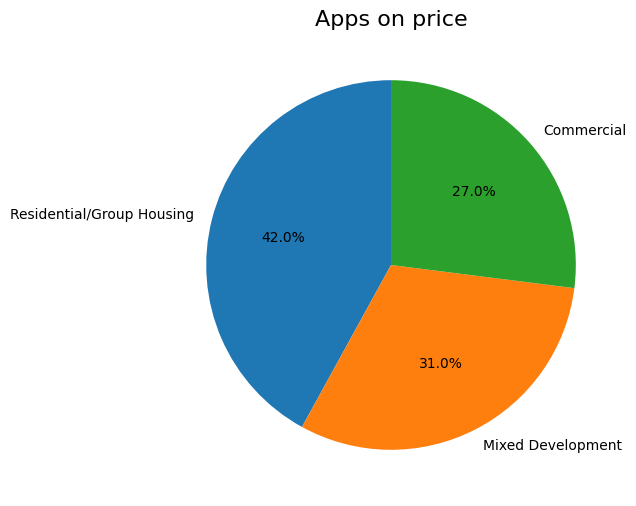

In [92]:
#Project Type distribution
#pie chart on price of apps
plt.figure(figsize=(8,6))
plt.title("Apps on price",fontsize = 16)
plt.pie(alldata_df.projectType.value_counts(), labels=alldata_df.projectType.value_counts().index,autopct='%1.1f%%',startangle=90)
plt.show()

In [93]:
#Flat booking status percentage (over the years or location-wise)

In [94]:
formthreeA_df.tail()

,id,formThreePk,blockId,blockName,usage,flatNo,carpetArea,areaofExBalcony,status,unitConsideration,encumbranceStatus,dateOfAgrrement,redeveloped,createdOn,projectRegID,receivedAmount,balanceAmount
59010,39911595,370089,,TOWER-H,Shop,FF-10,56.42,0.0,BOOKED,7189000,Released,,NO,2024-04-22 21:15:28,6326,7124810,64187
59011,39911596,370089,,TOWER-H,Shop,FF-11,54.79,0.0,BOOKED,2551000,Released,2023-02-22 00:00:00,NO,2024-04-22 21:15:28,6326,2551000,0
59012,39911597,370089,,TOWER-H,Shop,FF-12,51.70,0.0,BOOKED,2243500,Released,2023-02-22 00:00:00,NO,2024-04-22 21:15:28,6326,2243500,0
59013,39911598,370089,,TOWER-H,Shop,FF-13,83.19,0.0,BOOKED,9491965,Released,2021-02-05 00:00:00,NO,2024-04-22 21:15:28,6326,9407210,84751
59014,39911599,370089,,TOWER-H,Shop,FF-14,55.76,0.0,BOOKED,4809285,Released,,NO,2024-04-22 21:15:28,6326,4809280,0
